In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import xgboost
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

# Train data

In [64]:
train_data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\comments classification\Malignant Comments Classifier Project\train.csv")
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [65]:
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(train_data.shape))

The dataset contains  159,571 rows and  8 variables.


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Drop id column

In [5]:
train_data.drop('id',inplace=True,axis=1)

In [6]:
train_data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
train_data.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

# Test data

In [8]:
test_data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\comments classification\Malignant Comments Classifier Project\test.csv")
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(test_data.shape))

The dataset contains  153,164 rows and  2 variables.


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [11]:
test_data.drop('id',inplace=True,axis=1)
test_data.shape

(153164, 1)

# EDA

In [12]:
#statistical analysis on numeric data
train_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

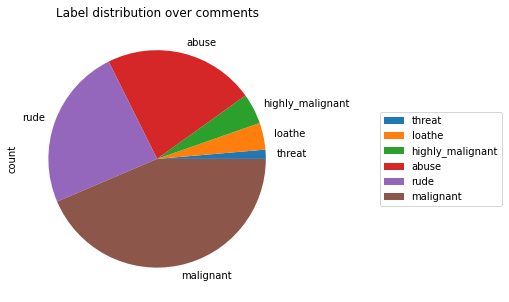

In [14]:
df_distribution = train_data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

### Target varaible distribution

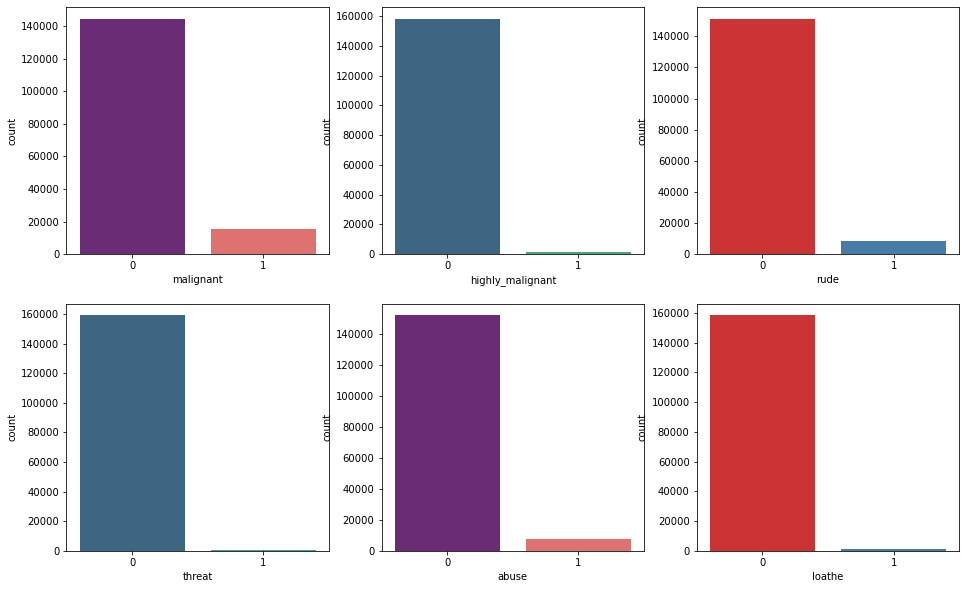

In [15]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train_data['malignant'],palette= 'magma',ax=ax1)
sns.countplot(train_data['highly_malignant'], palette= 'viridis',ax=ax2)
sns.countplot(train_data['rude'], palette= 'Set1',ax=ax3)
sns.countplot(train_data['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train_data['abuse'], palette = 'magma',ax=ax5)
sns.countplot(train_data['loathe'], palette = 'Set1', ax = ax6)

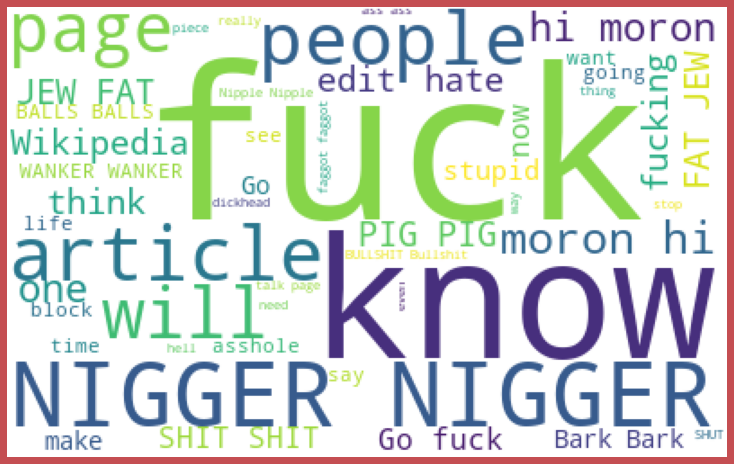

In [68]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud


spams = train_data['comment_text'][train_data['malignant']==1]

spam_cloud = WordCloud(width=400,height=250,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

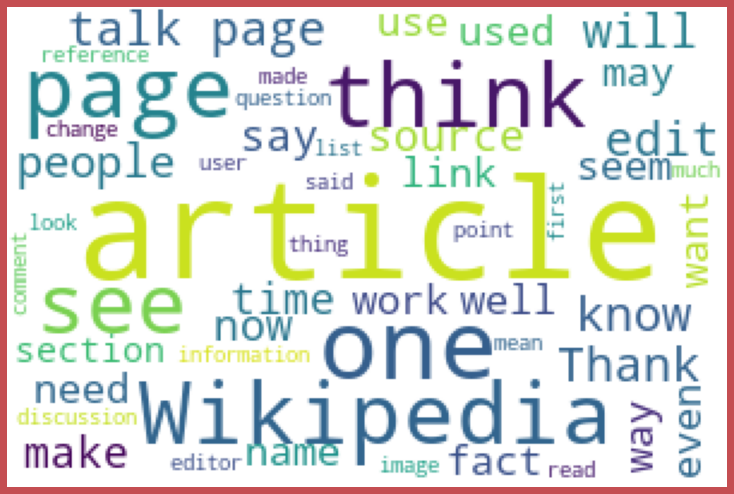

In [69]:
#Getting sense of loud words which are non offensive
from wordcloud import WordCloud


spams = train_data['comment_text'][train_data['malignant']==0]

spam_cloud = WordCloud(width=300,height=200,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
unlabelled_in_all = train_data[(train_data['malignant']!=1) & (train_data['highly_malignant']!=1) &
                             (train_data['rude']!=1) & (train_data['threat']!=1) &
                             (train_data['abuse']!=1) & (train_data['loathe']!=1)]
print('Percentage of unlabelled comments or good comments is ', len(unlabelled_in_all)/len(train_data)*100)

Percentage of unlabelled comments or good comments is  89.83211235124176


In [17]:
unlabelled_in_all = train_data[(train_data['malignant']==1) & (train_data['highly_malignant']==1) &
                             (train_data['rude']==1) & (train_data['threat']==1) &
                             (train_data['abuse']==1) & (train_data['loathe']==1)]
print('Percentage of all bad comments ', len(unlabelled_in_all)/len(train_data)*100)

Percentage of all bad comments  0.019427088882065038


In [18]:
# let's see the total rows in train data and the numbers for the various categories
print('Total rows in train is {}'.format(len(train_data)))
print(train_data[cols_target].sum())

Total rows in train is 159571
malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64


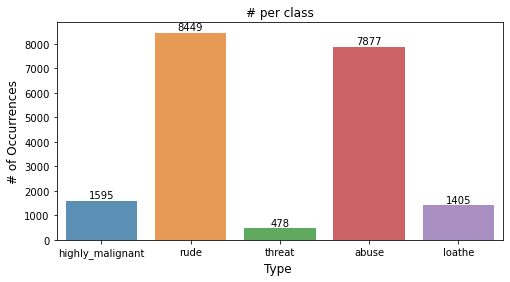

In [19]:
#plot
x=train_data.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

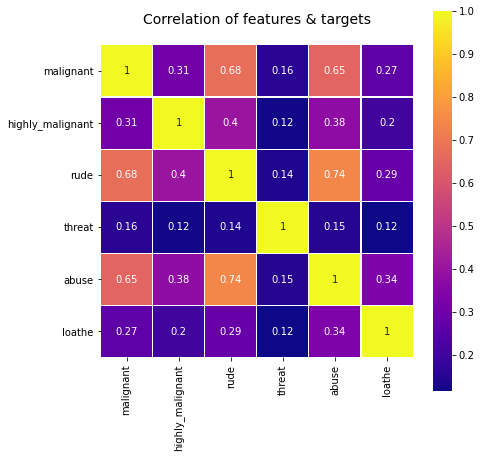

In [20]:
target_data = train_data[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(target_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

### There are features which are highly cor related:
    - It is possible because one comment can be classify into multiple categories
    - one comment can be rude and abuse at same time

### Lets us now make the comments classify only in 2 categories "bad" and "good"

In [21]:
train_data['bad'] =train_data[cols_target].sum(axis =1)
print(train_data['bad'].value_counts())
train_data['bad'] = train_data['bad'] > 0 
train_data['bad'] = train_data['bad'].astype(int)
print(train_data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


#### Now there are more number 143346 as good comments and 16225 as bad comments

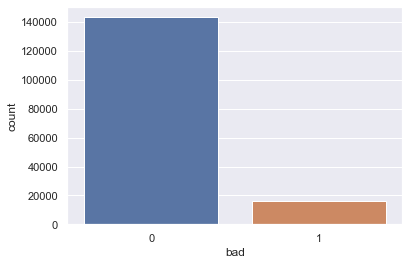

In [22]:
# look at the count plot for text length
sns.set()
sns.countplot(x="bad" , data = train_data )
plt.show()

In [23]:
df_comb = train_data.groupby(cols_target)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
df_comb.head(n=10)

,malignant,highly_malignant,rude,threat,abuse,loathe,count
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215
5,1,1,1,0,1,0,989
6,1,0,1,0,1,1,618
7,0,0,1,0,0,0,317
8,0,0,0,0,1,0,301
9,1,1,1,0,1,1,265


### from above table :
    - There are more number of comments which are not offensive
    - And the numbers are decreasing as the combination of comments are increasing
    - More 5 combination comments there are very less numbers in the dataset

# Text Preprocessing on comment columns

In [24]:
# Let's look at the character length for the rows in the training data and record these
train_data['char_length'] = train_data['comment_text'].apply(lambda x: len(str(x)))

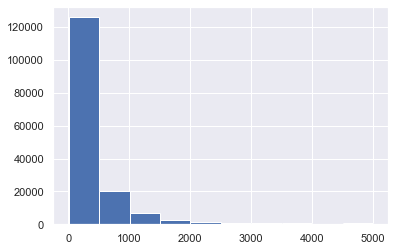

In [25]:
sns.set()
train_data['char_length'].hist()
plt.show()

##### Most of the text length are within 500 characters, with some up to 5,000 characters long

### Clean the Comments Text

In [26]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', " ",text)
    text = text.strip(' ')
    return text

In [27]:
# clean the comment_text in train part
train_data['comment_text'] = train_data['comment_text'].map(lambda com : clean_text(com))

In [28]:
# clean the comment_text in test part
test_data['comment_text'] = test_data['comment_text'].map(lambda com : clean_text(com))

#### Train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_data['comment_text'], train_data['bad'], test_size=0.2, random_state=42)

In [30]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(127656,) (31915,)
(127656,) (31915,)


# TfidfVectorizer

In [31]:
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
print(vect)

TfidfVectorizer(max_features=10000, stop_words='english')


##### for train_x and test_x

In [32]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape,X_test_dtm.shape)

(127656, 10000) (31915, 10000)


##### for test dataset

In [33]:
test_dtm = vect.fit_transform(test_data['comment_text'])
test_dtm

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2903311 stored elements in Compressed Sparse Row format>

# Model Creation

#### Logistic Regression

In [35]:
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(X_train_dtm, y_train)

y_pred_train = LG.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9597668734724573
Test accuracy is 0.9561334795550681
[[28497   174]
 [ 1226  2018]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.92      0.62      0.74      3244

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.95      0.96      0.95     31915



### In this we have to reduce false negative that is type 2 error

### Decision Tree

In [36]:
DT = DecisionTreeClassifier()

DT.fit(X_train_dtm, y_train)
y_pred_train = DT.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988092999937331
Test accuracy is 0.9429735234215886
[[27827   844]
 [  976  2268]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28671
           1       0.73      0.70      0.71      3244

    accuracy                           0.94     31915
   macro avg       0.85      0.83      0.84     31915
weighted avg       0.94      0.94      0.94     31915



### Random Forest

In [37]:
RF = RandomForestClassifier()

RF.fit(X_train_dtm, y_train)
y_pred_train = RF.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987779657830419
Test accuracy is 0.9579508068306439
[[28306   365]
 [  977  2267]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.86      0.70      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.91      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



### confusion matrix:
    28306 -> comments  are good and predicted as good 
    2267 -> comments are bad and predicted as bad
    365 -> comments are good but predicted as bad
    977 -> comments are bad but predicted as good

### XgBoost

In [39]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_dtm, y_train)
y_pred_train = xgb.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9390862944162437
Test accuracy is 0.9383675387748708
[[28620    51]
 [ 1916  1328]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28671
           1       0.96      0.41      0.57      3244

    accuracy                           0.94     31915
   macro avg       0.95      0.70      0.77     31915
weighted avg       0.94      0.94      0.93     31915



In [42]:
import eli5

eli5.show_weights(LG,vec = vect, top = 15)  # logistic regression
# will give you top 15 features or words  which makes a comment toxic 

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Python\Anaconda2\envs\Virtual\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight?,Feature
+16.262,gaps
+13.365,garden
+12.068,shout
+11.591,illiterate
+10.911,subsections
+10.031,asserted
+9.119,associated
+8.893,buddha
+8.754,sugar
+8.602,birmingham


In [44]:
eli5.show_weights(xgb,vec = vect,top = 15)  # XGBoost
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0330,gaps
0.0307,garden
0.0292,birmingham
0.0261,associated
0.0253,shout
0.0237,asdf
0.0227,differing
0.0209,asserted
0.0204,subsections
0.0199,farmers


### From above multiple models random forest perform well in terms of reducing type2 error and f1 score so this will be final model

In [48]:
prediction=RF.predict(test_dtm)
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [34]:
train_data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\comments classification\Malignant Comments Classifier Project\train.csv")
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [35]:
test_data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\comments classification\Malignant Comments Classifier Project\test.csv")
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [38]:
import gc

In [39]:
test_data.fillna(' ',inplace=True)
gc.collect()

4435

In [41]:
import numpy as np
vect_word = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,2),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=30000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(1,6),dtype=np.float32)

In [42]:
tr_vect = vect_word.fit_transform(train_data['comment_text'])
ts_vect = vect_word.transform(test_data['comment_text'])

tr_vect_char = vect_char.fit_transform(train_data['comment_text'])
ts_vect_char = vect_char.transform(test_data['comment_text'])
gc.collect()

1612

In [43]:
from scipy import sparse

In [44]:
X = sparse.hstack([tr_vect, tr_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])

In [46]:
y = train_data[cols_target]
del tr_vect, ts_vect, tr_vect_char, ts_vect_char
gc.collect()

1637

In [59]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(cols_target):
    lr = RandomForestClassifier(random_state = i)
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X,y[col])
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:malignant
Building 1 model for column:highly_malignant
Building 2 model for column:rude
Building 3 model for column:threat
Building 4 model for column:abuse
Building 5 model for column:loathe


In [60]:
col = 'loathe'
print("Column:",col)
pred =  lr.predict(X)
print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
print(classification_report(y[col],pred))

Column: loathe

Confusion matrix
 [[158166      0]
 [     4   1401]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158166
           1       1.00      1.00      1.00      1405

    accuracy                           1.00    159571
   macro avg       1.00      1.00      1.00    159571
weighted avg       1.00      1.00      1.00    159571



In [61]:
prd_1 = pd.DataFrame(prd,columns=y.columns)
submit = pd.concat([test_data['comment_text'],prd_1],axis=1)
submit.to_csv('submission.csv',index=False)
submit.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Yo bitch Ja Rule is more succesful then you'll...,0.84,0.18,0.77,0.01,0.73,0.15
1,== From RfC == \n\n The title is fine as it is...,0.04,0.00,0.00,0.00,0.02,0.00
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.02,0.00,0.04,0.00,0.00,0.00
3,":If you have a look back at the source, the in...",0.01,0.00,0.00,0.00,0.00,0.00
4,I don't anonymously edit articles at all.,0.04,0.00,0.00,0.00,0.03,0.00
